In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [160]:
r0=0.01
step=20
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)
R=np.zeros(step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]

In [159]:
M = np.zeros(step)
rho=np.zeros(step)

for n in range(step):
    inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M[n]=np.sum(m1[inbin])+np.sum(m2[inbin]) #mass array with both masses of binary system
    rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    R[n]=np.mean(r_3d[inbin]) #calculates mean distance of bin
    
#extrabin am anfang
M_extra=np.sum(m1[r_3d<r0])+np.sum(m2[r_3d<r0])
rho_extra=M_extra/(r0**2*np.pi)
R_extra=np.mean(r_3d[r_3d<r0])
#einfuegen in bereits angefertigte arrays an erster Stelle
M_final=np.insert(M,0,M_extra)
rho_final=np.insert(rho,0,rho_extra)
R_final=np.insert(R,0,R_extra)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


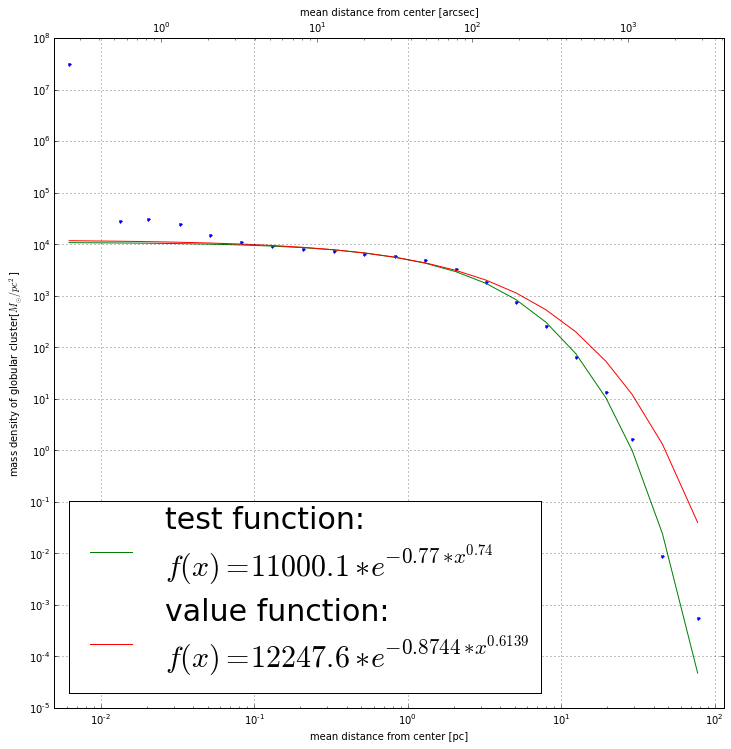

In [279]:
#defining fit function
def func(x,a,b,c):
    return a * np.exp((-b) * (x**c)) 

#trying to find a function which is near the given values
xdata = R_final
y = func(xdata, 11000, 0.77, 0.74)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

#optimizing this function
popt, pcov = curve_fit(func, xdata, ydata,maxfev=10000)

#trying to optimize function for given values R_final and Rho_final, know initial values from above
rho_noise=rho_final+0.2 * np.random.normal(size=len(R_final))
popt1,pcov1=curve_fit(func,R_final[5:],rho_noise[5:],p0=[12000, 0.5, 0.5])

#plotting
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.loglog(R_final,rho_final,'.')
ax1.loglog( xdata,func(xdata,*popt),label='test function:\n$f(x)='+str(round(popt[0],1))+'*e^{-'+str(round(popt[1],4))+'*x^{'+str(round(popt[2],4))+'}}$')
ax1.loglog(R_final,func(R_final,*popt1),label='value function:\n$f(x)='+str(round(popt1[0],1))+'*e^{-'+str(round(popt1[1],4))+'*x^{'+str(round(popt1[2],4))+'}}$')
ax1.set_xlim(0.005,115)
ax1.set_xlabel('mean distance from center [pc]')
ax1.set_ylabel('mass density of globular cluster[$M_\odot/pc^2$]')
ax1.grid(True)
ax1.legend(loc=3,prop={'size':30})

ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]')


plt.show()
#RuntimeWarnings are because of the test function and not because of the value function

In [280]:
print(popt)
print(popt1)

[  1.10001381e+04   7.70017430e-01   7.39980051e-01]
[  1.22475877e+04   8.74408052e-01   6.13872083e-01]
